In [72]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
import pandas as pd

In [91]:
import hopsworks

# project = hopsworks.login()
# fs = project.get_feature_store()
project = hopsworks.login(project="ID2223_23_lab1")
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/193693
Connected. Call `.close()` to terminate connection gracefully.


In [ ]:
star_df = pd.read_csv("D:/Desktop/star_classification.csv",nrows=20001)
star_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,1.237651e+18,118.188167,44.085136,25.64453,22.74920,20.78390,19.89102,19.35816,1402,301,4,84,7.178929e+18,GALAXY,0.501545,6376,56269,695
19997,1.237664e+18,123.109994,58.186645,19.60161,19.41832,19.41733,19.13950,19.05412,4264,301,6,155,2.108897e+18,QSO,1.854104,1873,54437,316
19998,1.237663e+18,359.461825,28.348221,19.39042,17.85960,17.23222,16.95590,16.89005,4152,301,1,103,3.156006e+18,STAR,0.000079,2803,54368,396
19999,1.237653e+18,344.763611,14.038418,25.97670,21.18209,20.23094,19.89018,19.65660,1739,301,3,204,8.344554e+17,STAR,-0.000178,741,52261,595


In [ ]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       20001 non-null  float64
 1   alpha        20001 non-null  float64
 2   delta        20001 non-null  float64
 3   u            20001 non-null  float64
 4   g            20001 non-null  float64
 5   r            20001 non-null  float64
 6   i            20001 non-null  float64
 7   z            20001 non-null  float64
 8   run_ID       20001 non-null  int64  
 9   rerun_ID     20001 non-null  int64  
 10  cam_col      20001 non-null  int64  
 11  field_ID     20001 non-null  int64  
 12  spec_obj_ID  20001 non-null  float64
 13  class        20001 non-null  object 
 14  redshift     20001 non-null  float64
 15  plate        20001 non-null  int64  
 16  MJD          20001 non-null  int64  
 17  fiber_ID     20001 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usa

In [ ]:
star_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,2.000100e+04,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.0,20001.000000,20001.000000,2.000100e+04,20001.000000,20001.000000,20001.000000,20001.000000
mean,1.237665e+18,177.491672,22.657403,22.047576,20.600304,19.631343,19.083148,18.772938,4579.179491,301.0,3.520274,187.574471,5.714601e+18,0.576256,5075.476076,55544.313134,447.941803
std,8.510773e+12,100.045006,19.132718,2.251020,2.041212,1.864334,1.774308,1.792229,1981.586724,0.0,1.563522,147.343713,3.327271e+18,0.739134,2955.195732,1822.532596,267.897320
min,1.237646e+18,0.005528,-16.847136,12.262400,10.511390,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995793e+17,-0.006863,266.000000,51608.000000,1.000000
25%,1.237659e+18,124.632539,3.497388,20.322760,18.958320,18.098650,17.696790,17.428010,3225.000000,301.0,2.000000,83.000000,2.735961e+18,0.050407,2430.000000,54156.000000,227.000000
50%,1.237664e+18,179.297150,21.097301,22.129660,21.042670,20.111690,19.412300,19.017080,4263.000000,301.0,4.000000,151.000000,5.602709e+18,0.399233,4976.000000,55863.000000,434.000000
75%,1.237671e+18,236.699869,37.727081,23.653320,22.102180,21.033230,20.422070,19.947520,5934.000000,301.0,5.000000,243.000000,8.259854e+18,0.712731,7336.000000,56748.000000,636.000000
max,1.237681e+18,359.999810,82.764421,29.325650,31.602240,27.397090,30.154600,26.427790,8162.000000,301.0,6.000000,847.000000,1.412685e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
star_df['class'].value_counts()

class
GALAXY    11782
STAR       4346
QSO        3873
Name: count, dtype: int64

In [ ]:
duplicate_rows = star_df[star_df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [obj_ID, alpha, delta, u, g, r, i, z, run_ID, rerun_ID, cam_col, field_ID, spec_obj_ID, class, redshift, plate, MJD, fiber_ID]
Index: []


In [ ]:
star_df = star_df[['u', 'g', 'r', 'i', 'z','class', 'redshift']]

In [ ]:
star_df 

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...
19996,25.64453,22.74920,20.78390,19.89102,19.35816,GALAXY,0.501545
19997,19.60161,19.41832,19.41733,19.13950,19.05412,QSO,1.854104
19998,19.39042,17.85960,17.23222,16.95590,16.89005,STAR,0.000079
19999,25.97670,21.18209,20.23094,19.89018,19.65660,STAR,-0.000178


### Exploratory Data Analysis (EDA) our star Data

Let's look at our star data- the distribution and range of values for the 6 different features
- u
- g
- r
- i
- z
- redshift
and the target variable is `class`.


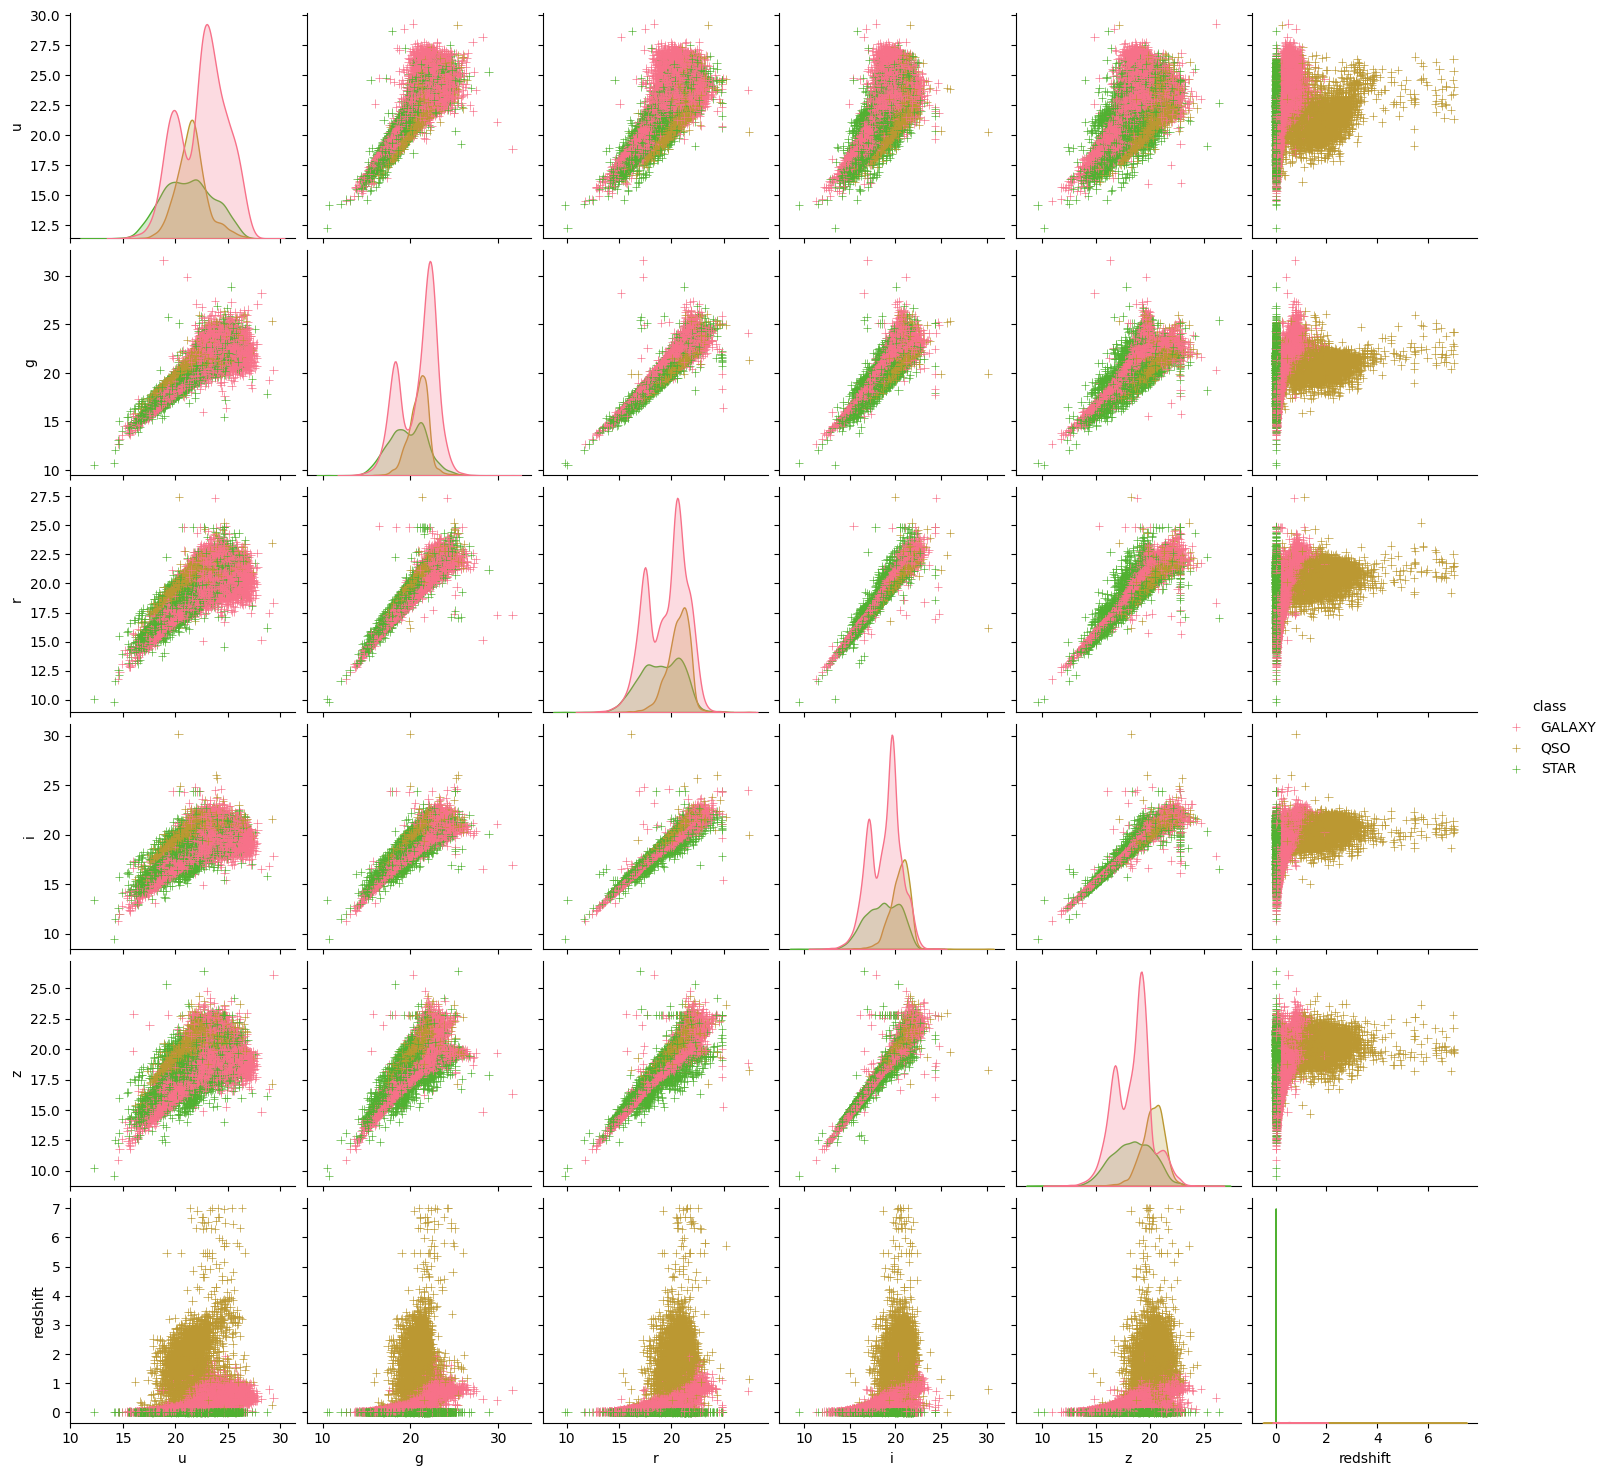

In [ ]:
g = sns.pairplot(star_df, hue='class', markers='+')
plt.show()

In [75]:
independence = star_df.drop("class",axis=1)
correlation_matrix = independence.corr()
print(correlation_matrix)

                 u         g         r         i         z  redshift
u         1.000000  0.852369  0.727827  0.616851  0.545542  0.159597
g         0.852369  1.000000  0.930476  0.845786  0.772798  0.316380
r         0.727827  0.930476  1.000000  0.964110  0.918991  0.430254
i         0.616851  0.845786  0.964110  1.000000  0.969125  0.485269
z         0.545542  0.772798  0.918991  0.969125  1.000000  0.490752
redshift  0.159597  0.316380  0.430254  0.485269  0.490752  1.000000


### Visualize range of values 

We want to design a simulator generate the 3 types of iris flower (setosa, versicolor, virginica).
To do this, we can visualize the range of values for the length and width of the sepal and petal for each of the 3 flowers.


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



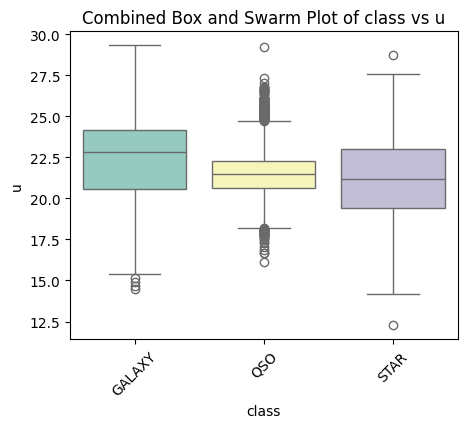


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



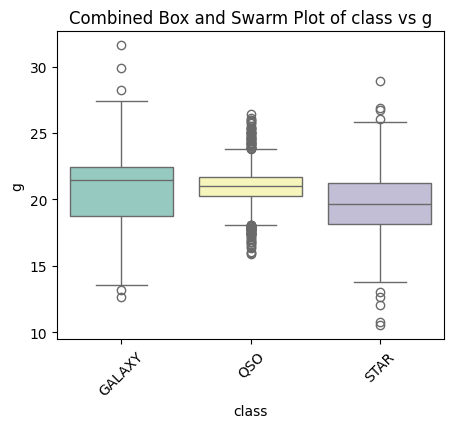


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



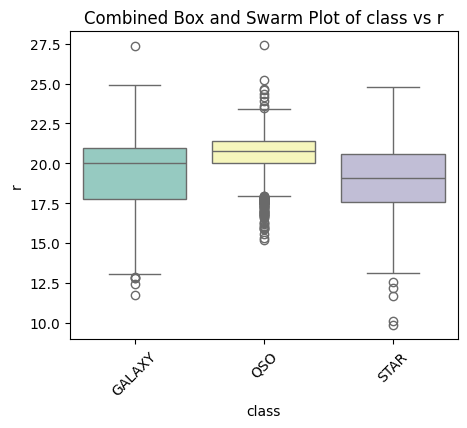


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



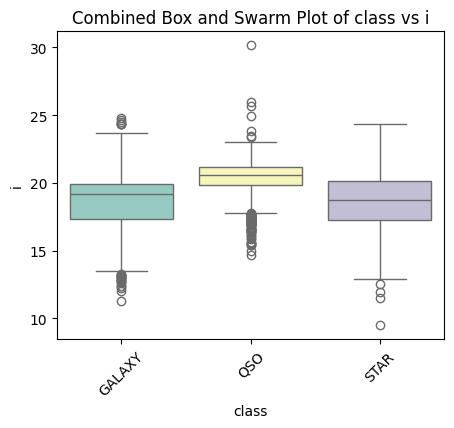


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



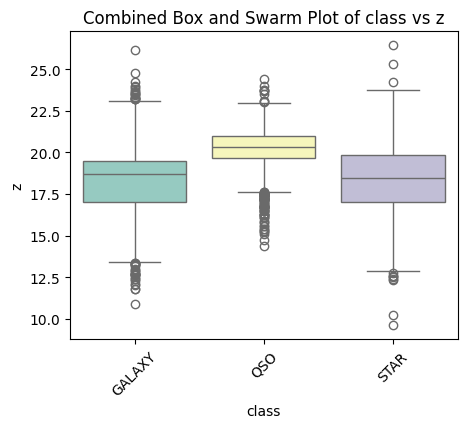


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



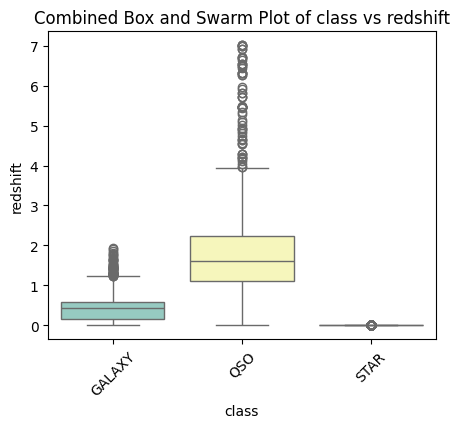

In [83]:
# # cat_var = 'type'  
cont_vars = ['u', 'g', 'r', 'i', 'z', 'redshift']
# plt.figure(figsize=(10, 6))
# sns.violinplot(y='class', data=star_df, inner='quartile')
# plt.title(f'Violin Plot of Quality vs')
# plt.xticks(rotation=45)
# plt.show()

for var in cont_vars:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x='class', y=var, data=star_df, palette="Set3")
    plt.title(f'Combined Box and Swarm Plot of class vs {var}')
    plt.xticks(rotation=45)
    plt.show()

['GALAXY' 'QSO' 'STAR']


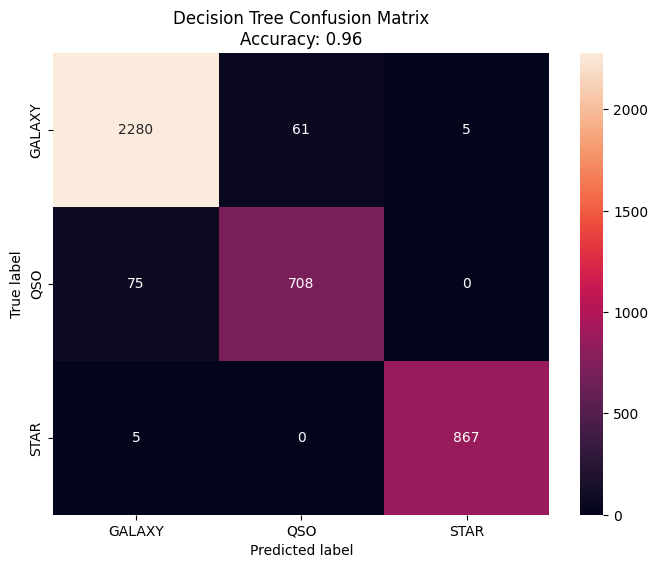

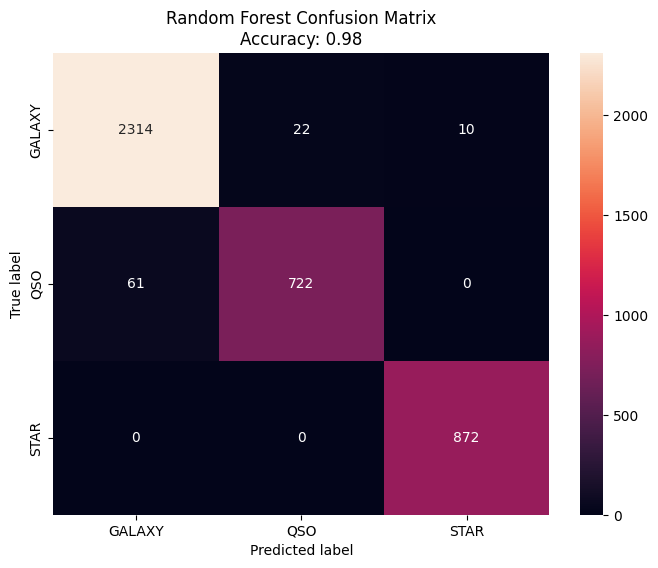

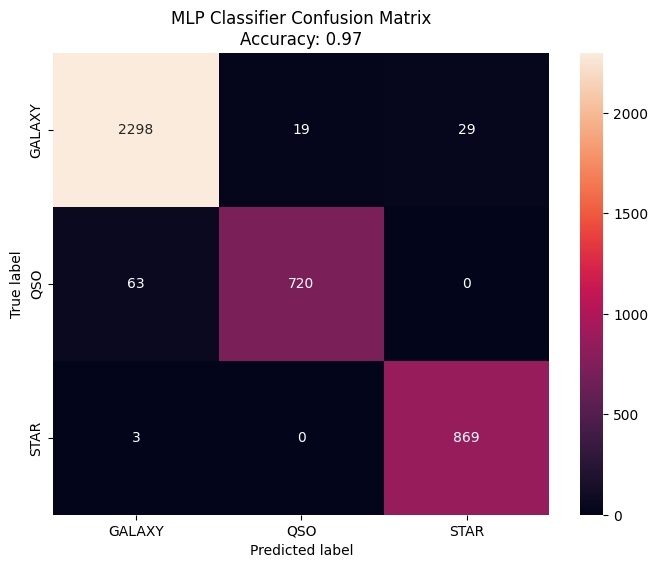

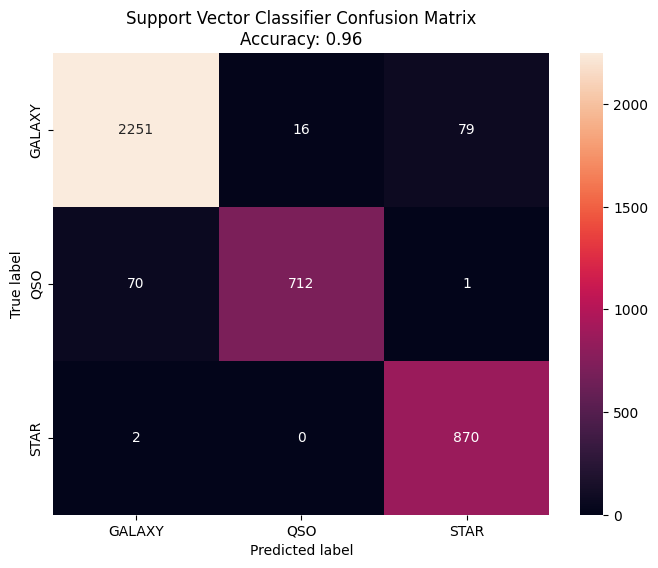

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


X = star_df.drop('class', axis=1)
y = star_df['class']
print(star_df['class'].unique())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "Support Vector Classifier": SVC()
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['GALAXY', 'QSO','STAR'], yticklabels=['GALAXY', 'QSO','STAR'])
    plt.title(f'{name} Confusion Matrix\nAccuracy: {accuracy:.2f}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


### Insert our Wine DataFrame into a FeatureGroup
Let's write our historical iris feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [88]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
grouped = star_df.groupby('class')

stats_GALAXY = grouped.get_group('GALAXY').drop('class', axis=1).describe()
stats_QSO = grouped.get_group('QSO').drop('class', axis=1).describe()
stats_STAR = grouped.get_group('STAR').drop('class', axis=1).describe()

print("Statistics for 'class' = GALAXY:")
print(stats_GALAXY)

print("\nStatistics for 'class' = QSO:")
print(stats_QSO)

print("\nStatistics for 'class' = STAR:")
print(stats_STAR)

with open('stats_GALAXY.txt', 'w') as file:
    file.write(stats_GALAXY.to_string())

with open('stats_QSO.txt', 'w') as file:
    file.write(stats_QSO.to_string())

with open('stats_STAR.txt', 'w') as file:
    file.write(stats_STAR.to_string())

Statistics for 'class' = GALAXY:
                  u             g             r             i             z  \
count  11782.000000  11782.000000  11782.000000  11782.000000  11782.000000   
mean      22.520225     20.836812     19.539080     18.817326     18.420516   
std        2.295344      2.138585      1.905597      1.721534      1.693065   
min       14.506780     12.679020     11.746640     11.299560     10.918470   
25%       20.572073     18.784320     17.760782     17.321400     17.030765   
50%       22.799740     21.501225     20.041670     19.167970     18.726420   
75%       24.173693     22.431000     20.953392     19.942025     19.468055   
max       29.325650     31.602240     27.334760     24.784710     26.130110   

           redshift  
count  11782.000000  
mean       0.411946  
std        0.268344  
min       -0.006863  
25%        0.152150  
50%        0.436310  
75%        0.585961  
max        1.932613  

Statistics for 'class' = QSO:
                 u        

In [102]:
star_df.rename(columns={'class': 'type'}, inplace=True)
star_df.head()

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,u,g,r,i,z,type,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


In [105]:
star_df['type'], star_df['redshift'] = star_df['redshift'].copy(), star_df['type'].copy()
star_df.columns = star_df.columns.to_series().replace({'type': 'redshift', 'redshift': 'type'}).tolist()
star_df.head()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,u,g,r,i,z,redshift,type
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY


In [106]:
star_fg = fs.get_or_create_feature_group(
    name="star",
    version=1,
    primary_key=['u', 'g', 'r', 'i', 'z', 'redshift'], 
    description="Star_classification_dataset")
star_fg.insert(star_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/193693/fs/193612/fg/376148


Uploading Dataframe: 100.00% |██████████| Rows 20001/20001 | Elapsed Time: 00:07 | Remaining Time: 00:00


Launching job: star_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/193693/jobs/named/star_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x18dedfc5d80>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent wine data from being written your your feature group if you write values outside the expected ranges.

In [ ]:
# from great_expectations.core import ExpectationSuite, ExpectationConfiguration

# def expect(suite, column, min_val, max_val):
#     suite.add_expectation(
#     ExpectationConfiguration(
#         expectation_type="expect_column_values_to_be_between",
#         kwargs={
#             "column":column, 
#             "min_value":min_val,
#             "max_value":max_val,
#         }
#     )
# )

In [ ]:
# suite = ExpectationSuite(expectation_suite_name="iris_dimensions")

# expect(suite, "sepal_length", 4.5, 8.0)
# expect(suite, "sepal_width", 2.1, 4.5)
# expect(suite, "petal_length", 1.2, 7)
# expect(suite, "petal_width", 0.2, 2.5)
# iris_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/193693/fs/193612/fg/211287
